## LOGISTIC REGRESSION

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading and Cleaning

In [92]:
titanic_test=pd.read_csv('Titanic_test.csv')
titanic_train=pd.read_csv('Titanic_train.csv')

In [94]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
print(titanic_test.shape)

print(titanic_train.shape)

(418, 11)
(891, 12)


In [100]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [102]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [106]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
# Check for missing values and decide how to handle them
missing_values1 = titanic_test.isnull().sum()       #find missing values in titanic test data
print("Missing Values in titanic test:")
print(missing_values1)

Missing Values in titanic test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [110]:
# Check for missing values and decide how to handle them
missing_values2 = titanic_train.isnull().sum()       #find missing values in titanic train data
print("Missing Values in titanic train:")
print(missing_values2)

Missing Values in titanic train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [112]:
#This replaces all NaN values in the Age column of titanic_test and titanic_train with the median age of that column.

print(titanic_test['Age'].fillna(titanic_test['Age'].median()))

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64


In [114]:
print(titanic_train['Age'].fillna(titanic_train['Age'].median()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [116]:
titanic_test.dropna(subset=['Embarked'], inplace=True)
titanic_train.dropna(subset=['Embarked'], inplace=True)

In [118]:
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0])

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [120]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [122]:
data_1=titanic_test.dropna(subset=['Cabin'])
data_2=titanic_train.dropna(subset=['Cabin'])

In [124]:
print(data_1)

     PassengerId  Pclass                                               Name  \
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26           918       1                       Ostby, Miss. Helene Ragnhild   
28           920       1                            Brady, Mr. John Bertram   
..           ...     ...                                                ...   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
407         1299       1                         Widener, Mr. George Dunton   
411         1303       1    Minahan, Mrs. William Edward (Lillian E Thorpe)   
414         1306       1                       Oliva y Ocana, Dona. Fermina   

        Sex   Age  SibSp  Parch         Ticket     

In [126]:
print(data_2)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [128]:
data_1.shape

(91, 11)

In [130]:
data_2.shape

(202, 12)

In [132]:
data_1['Fare'].fillna(data_1['Fare'].mean())


12      82.2667
14      61.1750
24     262.3750
26      61.9792
28      30.5000
         ...   
404     27.7208
405     13.8625
407    211.5000
411     90.0000
414    108.9000
Name: Fare, Length: 91, dtype: float64

In [134]:
data_1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            4
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [136]:
data_2['Fare'].fillna(data_2['Fare'].mean())

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 202, dtype: float64

In [138]:
data_2.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

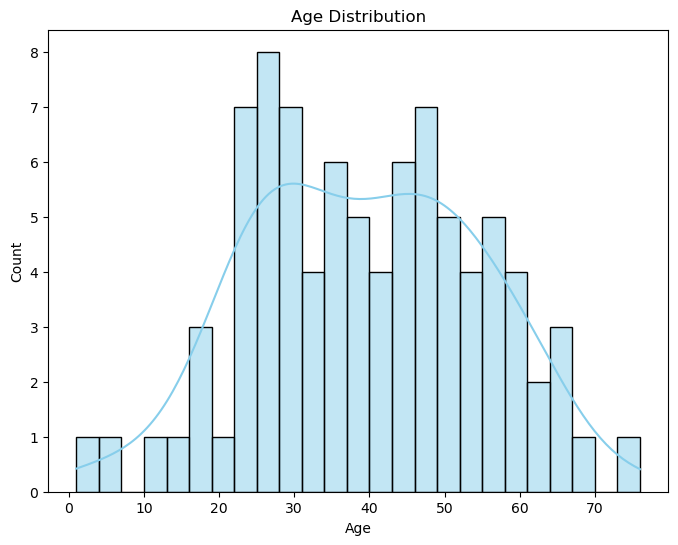

In [140]:
#Visulize histogram
plt.figure(figsize=(8, 6))
sns.histplot(data_1['Age'], bins=25, kde=True,color='skyblue')
plt.title('Age Distribution')
plt.show()


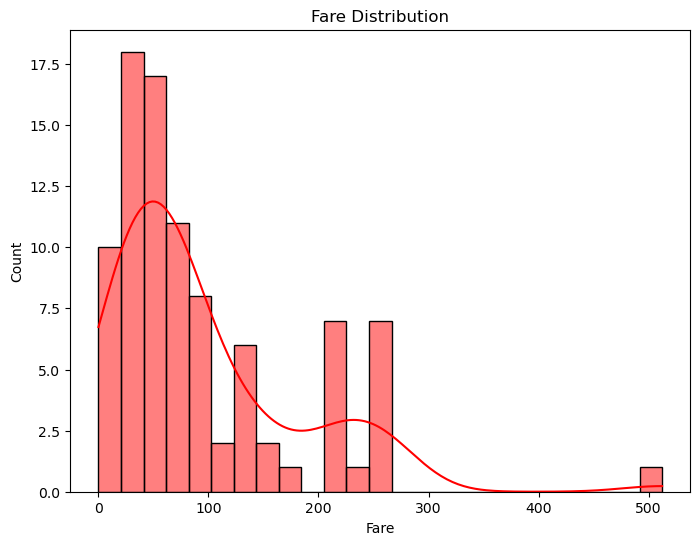

In [142]:
plt.figure(figsize=(8, 6))
sns.histplot(data_1['Fare'], bins=25, kde=True,color='red')
plt.title('Fare Distribution')
plt.show()

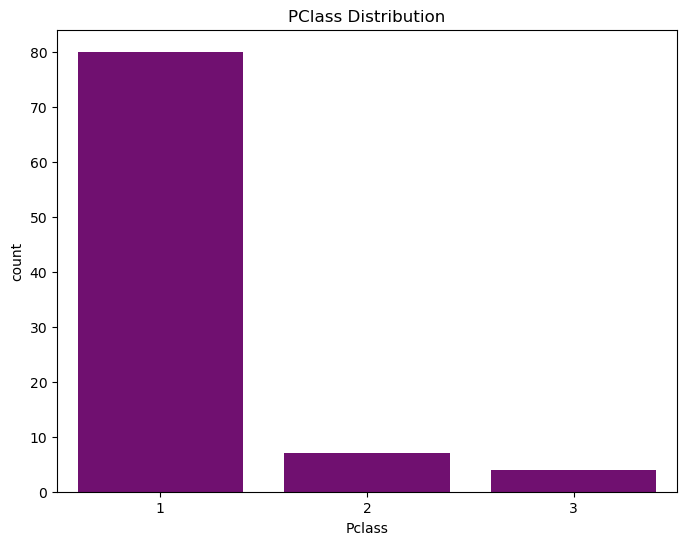

In [144]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass',data=data_1,color='purple')
plt.title('PClass Distribution')
plt.show()

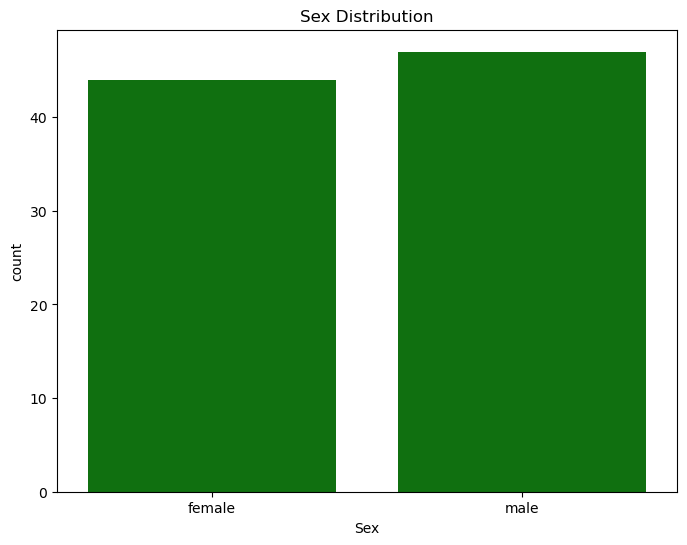

In [146]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data_1,color='green')
plt.title('Sex Distribution')
plt.show()

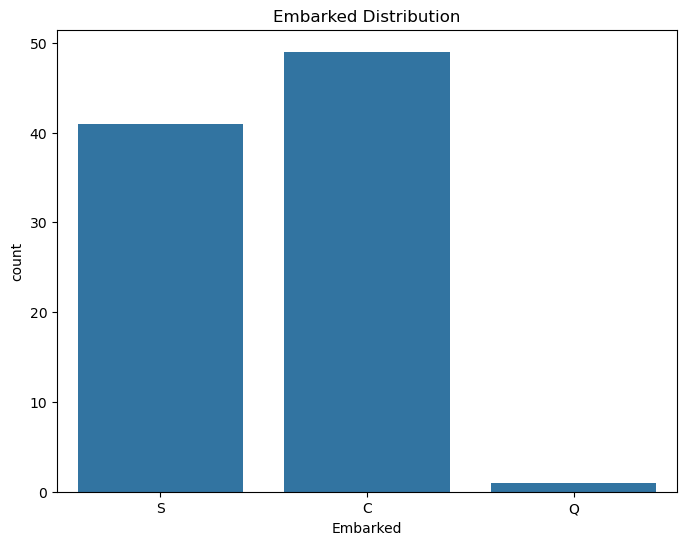

In [148]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=data_1)
plt.title('Embarked Distribution')
plt.show()

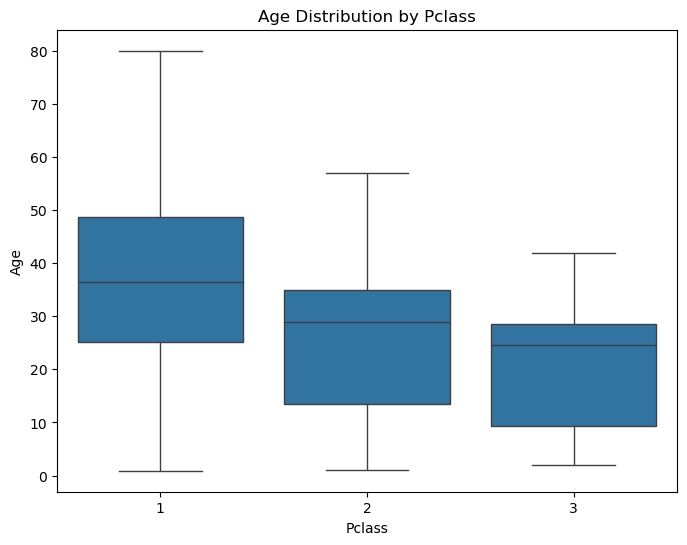

In [150]:
#boxplot visulaization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=data_2)
plt.title('Age Distribution by Pclass')
plt.show()

In [152]:
# exploratory data analysis (EDA) by summarizing categorical distributions. This can be useful for understanding the dataset and handling missing values if necessary.
print(data_1['Sex'].value_counts())

Sex
male      47
female    44
Name: count, dtype: int64


In [154]:
print(data_1['Embarked'].value_counts())   

Embarked
C    49
S    41
Q     1
Name: count, dtype: int64


In [156]:
print(data_1['Pclass'].value_counts()) 

Pclass
1    80
2     7
3     4
Name: count, dtype: int64


In [158]:
print(data_1['Age'].value_counts()) 

Age
55.0    4
48.0    4
36.0    4
30.0    4
45.0    4
27.0    3
39.0    3
25.0    3
23.0    3
64.0    3
50.0    3
42.0    2
54.0    2
37.0    2
53.0    2
47.0    2
26.0    2
43.0    2
18.0    2
35.0    2
31.0    2
24.0    2
60.0    2
41.0    2
22.0    2
12.0    1
57.0    1
33.0    1
59.0    1
46.0    1
49.0    1
51.0    1
58.0    1
63.0    1
6.0     1
29.0    1
61.0    1
1.0     1
18.5    1
76.0    1
67.0    1
32.5    1
28.5    1
13.0    1
28.0    1
20.0    1
Name: count, dtype: int64


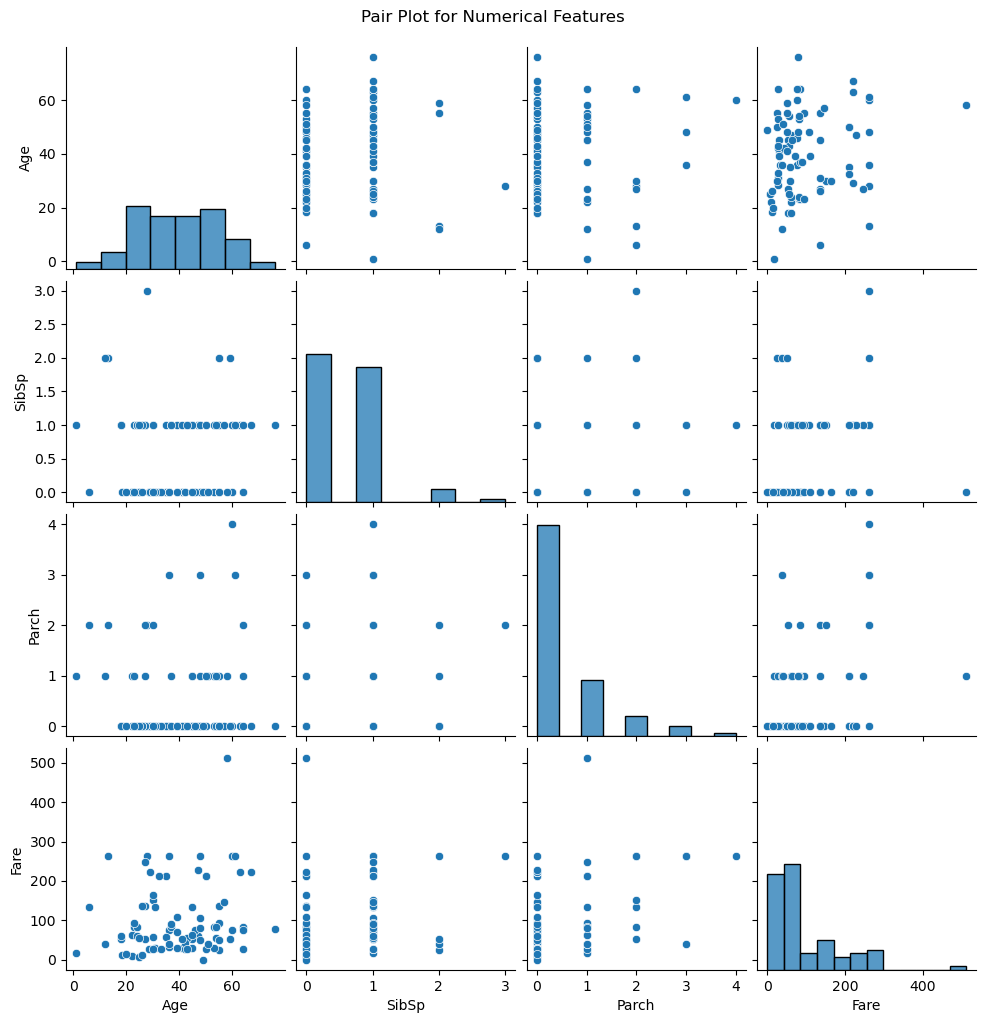

In [160]:
#Pairplot to visualizing relatiomship,detecting colrrelations,and outlier Detection.

sns.pairplot(data_1[['Age', 'SibSp', 'Parch', 'Fare']])
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

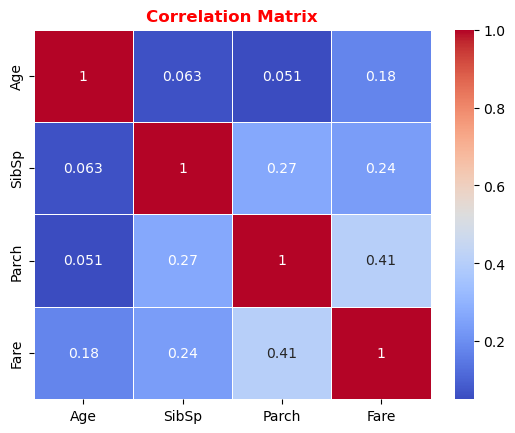

In [161]:
#Correlation  Matrix 
sns.heatmap(data_1[['Age', 'SibSp', 'Parch', 'Fare']].corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix',color='red',fontweight='bold')
plt.show()

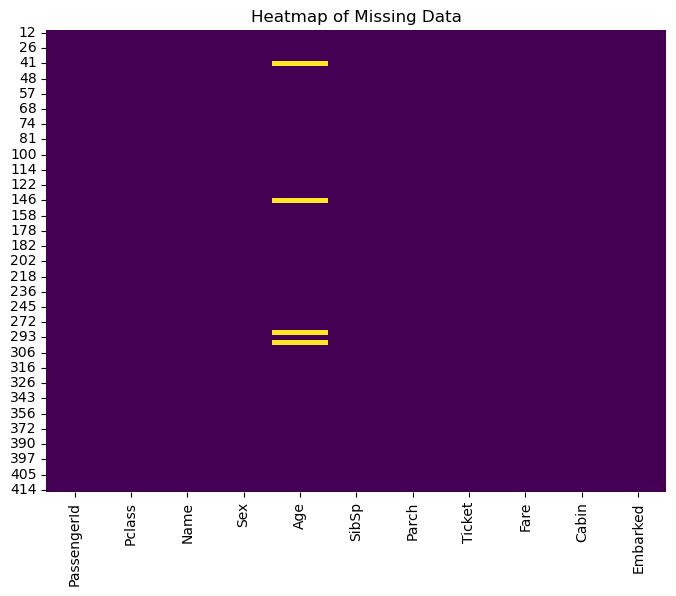

In [162]:
#Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(data_1.isnull(), cbar=False, cmap="viridis")
plt.title('Heatmap of Missing Data')
plt.show()

### Data Preprocessing:

In [167]:
if 'Embarked' in data_1.columns:
    data_1['Embarked'].fillna(data_1['Embarked'].mode()[0])
else:
    print("The 'Embarked' column is missing.")

In [169]:
data_1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [171]:
if 'Embarked' in data_2.columns:
    data_2['Embarked'].fillna(data_2['Embarked'].mode()[0])
else:
    print("The 'Embarked' column is missing.")

In [173]:
data_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [175]:
data_1['Age'].fillna(data_1['Age'].median())
data_1['Embarked'].fillna(data_1['Embarked'].mode()[0])

12     S
14     S
24     C
26     C
28     S
      ..
404    C
405    C
407    C
411    Q
414    C
Name: Embarked, Length: 91, dtype: object

In [177]:
data_2['Age'].fillna(data_2['Age'].median())
data_2['Embarked'].fillna(data_2['Embarked'].mode()[0])

1      C
3      S
6      S
10     S
11     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 202, dtype: object

In [179]:
#import label encoder package
from sklearn.preprocessing import LabelEncoder

In [181]:
label_encoder=LabelEncoder()

In [183]:
data_1['Sex'] = label_encoder.fit_transform(data_1['Sex'])
data_1 = pd.get_dummies(data_2, columns=['Embarked'], drop_first=True)
data_1= pd.get_dummies(data_2, columns=['Pclass'], drop_first=True)

import warnings
warnings.filterwarnings('ignore')

In [185]:
print(data_1)

     PassengerId  Survived                                               Name  \
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
6              7         0                            McCarthy, Mr. Timothy J   
10            11         1                    Sandstrom, Miss. Marguerite Rut   
11            12         1                           Bonnell, Miss. Elizabeth   
..           ...       ...                                                ...   
871          872         1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872          873         0                           Carlsson, Mr. Frans Olof   
879          880         1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
887          888         1                       Graham, Miss. Margaret Edith   
889          890         1                              Behr, Mr. Karl Howell   

        Sex   Age  SibSp  P

In [187]:
data_1['Sex']

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 202, dtype: object

### Model Building:

In [190]:
#import important paackages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [192]:
print(data_2.drop(['Name','Ticket'],axis=1))
print(data_2.drop(['Cabin','Embarked'],axis=1))

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
1              2         1       1  female  38.0      1      0  71.2833   
3              4         1       1  female  35.0      1      0  53.1000   
6              7         0       1    male  54.0      0      0  51.8625   
10            11         1       3  female   4.0      1      1  16.7000   
11            12         1       1  female  58.0      0      0  26.5500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
871          872         1       1  female  47.0      1      1  52.5542   
872          873         0       1    male  33.0      0      0   5.0000   
879          880         1       1  female  56.0      0      1  83.1583   
887          888         1       1  female  19.0      0      0  30.0000   
889          890         1       1    male  26.0      0      0  30.0000   

           Cabin Embarked  
1            C85        C  
3           C123        S  
6            E4

In [194]:
data_3=data_2.drop(['Name','Ticket'],axis=1)
data_3=data_2.drop(['Cabin','Embarked'],axis=1)

In [196]:
data_3['Sex']=data_3['Sex'].astype('category')

In [198]:
data_3['Sex']=data_3['Sex'].cat.codes

In [200]:
print(data_3['Age'].fillna(data_3['Age'].median()))

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 202, dtype: float64


In [202]:
feature = data_3.drop(['PassengerId', 'Survived', 'Ticket', 'Name'], axis=1)
target = data_3['Survived']

In [204]:
target.head(10)

1     1
3     1
6     0
10    1
11    1
21    1
23    1
27    0
31    1
52    1
Name: Survived, dtype: int64

In [206]:
feature.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,0,38.0,1,0,71.2833
3,1,0,35.0,1,0,53.1000
6,1,1,54.0,0,0,51.8625
10,3,0,4.0,1,1,16.7000
11,1,0,58.0,0,0,26.5500
21,2,1,34.0,0,0,13.0000
23,1,1,28.0,0,0,35.5000
27,1,1,19.0,3,2,263.0000
31,1,0,NaN,1,0,146.5208
52,1,0,49.0,1,0,76.7292


In [208]:
feature.dtypes

Pclass      int64
Sex          int8
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [210]:
data_3.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
dtype: int64

In [212]:
from sklearn.preprocessing import LabelEncoder

In [214]:
label_encoder=LabelEncoder

In [216]:
data_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500


In [218]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=100)

In [220]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 6)
(41, 6)
(161,)
(41,)


In [222]:
print(x_train.dtypes)

Pclass      int64
Sex          int8
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object


In [224]:
print(x_train.head())

     Pclass  Sex   Age  SibSp  Parch      Fare
867       1    1  31.0      0      0   50.4958
174       1    1  56.0      0      0   30.6958
307       1    0  17.0      1      0  108.9000
137       1    1  37.0      1      0   53.1000
871       1    0  47.0      1      1   52.5542


In [250]:
#Removing NaN value from x_train
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # Ensure target variable matches
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]

In [257]:
log_model=LogisticRegression()

In [259]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [261]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64
Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


### Model Evaluation:

In [255]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve

In [265]:
y_pred = log_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [267]:
accuracy_score(y_test,y_pred)

0.75

In [269]:
pred_proba=log_model.predict_proba(x_test)
pred_proba

array([[0.04283248, 0.95716752],
       [0.73302792, 0.26697208],
       [0.04260135, 0.95739865],
       [0.13251487, 0.86748513],
       [0.77600876, 0.22399124],
       [0.48379597, 0.51620403],
       [0.14661869, 0.85338131],
       [0.12814703, 0.87185297],
       [0.06485041, 0.93514959],
       [0.67438491, 0.32561509],
       [0.09478801, 0.90521199],
       [0.51671612, 0.48328388],
       [0.60642409, 0.39357591],
       [0.12583315, 0.87416685],
       [0.062989  , 0.937011  ],
       [0.09389564, 0.90610436],
       [0.60187323, 0.39812677],
       [0.24772188, 0.75227812],
       [0.0808738 , 0.9191262 ],
       [0.59572881, 0.40427119],
       [0.36401902, 0.63598098],
       [0.02579289, 0.97420711],
       [0.60515069, 0.39484931],
       [0.42565409, 0.57434591],
       [0.06083084, 0.93916916],
       [0.45138098, 0.54861902],
       [0.13972459, 0.86027541],
       [0.6003359 , 0.3996641 ],
       [0.14908529, 0.85091471],
       [0.50715855, 0.49284145],
       [0.

In [275]:
#preprecision_score
precision_score(y_test,y_pred)

0.8461538461538461

In [277]:
#rerecall_score
recall_score(y_test,y_pred)

0.8148148148148148

In [281]:
#F1 score
f1_score(y_test,y_pred)

0.8301886792452831

In [283]:
pred_proba1=log_model.predict_proba(x_test)
sigmoid= pred_proba1[:,1]

In [285]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

0.7736625514403292

In [287]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)

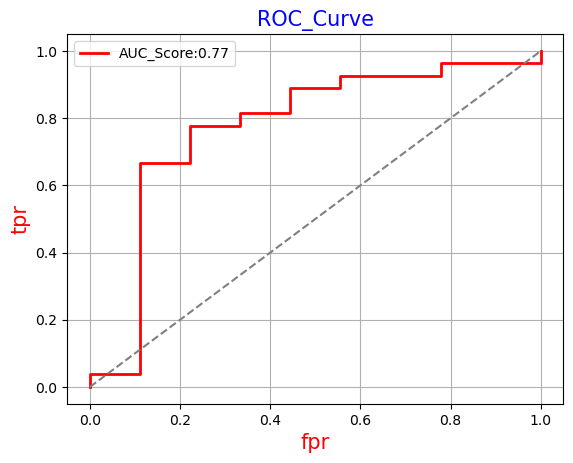

In [316]:
plt.plot(fpr,tpr,color='red',linewidth=2,label=f'AUC_Score:{auc_score:.2f}')
plt.plot([0,1],linestyle='--',color='grey')
plt.grid()
plt.xlabel('fpr',color='red',size=15)
plt.ylabel('tpr',color='red',size=15)
plt.title('ROC_Curve',color='Blue',size=15)
plt.legend()

### Interpretation:

In [305]:

coefficients = log_model.coef_[0]  # Extract coefficients
feature_names = x_train.columns  # Get feature names

# Create a DataFrame for better readability
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)     #Sort by importance

print(coef_df)

  Feature  Coefficient
1     Sex    -2.448110
0  Pclass    -0.415699
4   Parch    -0.383459
2     Age    -0.038539
3   SibSp    -0.018196
5    Fare     0.002858


### Deployment with Streamlit:

In [308]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [312]:
import streamlit as st
import joblib

In [314]:
joblib.dump(log_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

1.) Difference Between Precision and Recall
Precision and recall are two key metrics used in classification problems, particularly in imbalanced datasets. They help evaluate a model's performance beyond simple accuracy.

~~precision (Positive Predictive Value):
Definition: Precision measures the proportion of correctly predicted positive cases out of all cases predicted as positive.

Formula: Precision=True Positives (TP)/True Positives (TP)+False Positives (FP)

Intuition:
High precision means the model rarely misclassifies negatives as positives (few false positives).
Low precision means the model makes many false positive errors.

Example: If a Titanic survival prediction model classifies 10 passengers as survivors, but only 8 actually survived, the precision is: 8/10=0.8    (80% precision)


~~Recall (Sensitivity or True Positive Rate):
Definition: Recall measures how many actual positive cases were correctly identified by the model.

Formula:Recall=True Positives (TP)/True Positives (TP)+False Negatives (FN)

Intuition:
High recall means the model correctly identifies most actual positives (few false negatives).
Low recall means the model misses many positive cases.

Example: If 20 passengers actually survived, but the model correctly identified only 8, the recall is:8/20=0.4  (40% recall)
